In [1]:
#%% Importação dos pacotes

import pickle
import pandas as pd
from funcoes_ajuda import descritiva, relatorio_missing, \
    diagnóstico, avalia_clf
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, \
    StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#%% Importar a base (já tratada)
titanic = pd.read_pickle('titanic1.pkl')


In [3]:
#%% Checar rapidamente a base, tipos de dados e missing
titanic.info()
relatorio_missing(titanic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
Número de linhas: 891 | Número de colunas: 9


,Pct_missing,Freq_missing
survived,0.0%,0
pclass,0.0%,0
age,0.0%,0
sibsp,0.0%,0
parch,0.0%,0
fare,0.0%,0
sex_male,0.0%,0
embarked_Q,0.0%,0
embarked_S,0.0%,0


In [4]:
#%% Definindo a lista de features
variaveis = list(titanic.columns)
vResp = 'survived'

print(variaveis)
print(vResp)


['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
survived


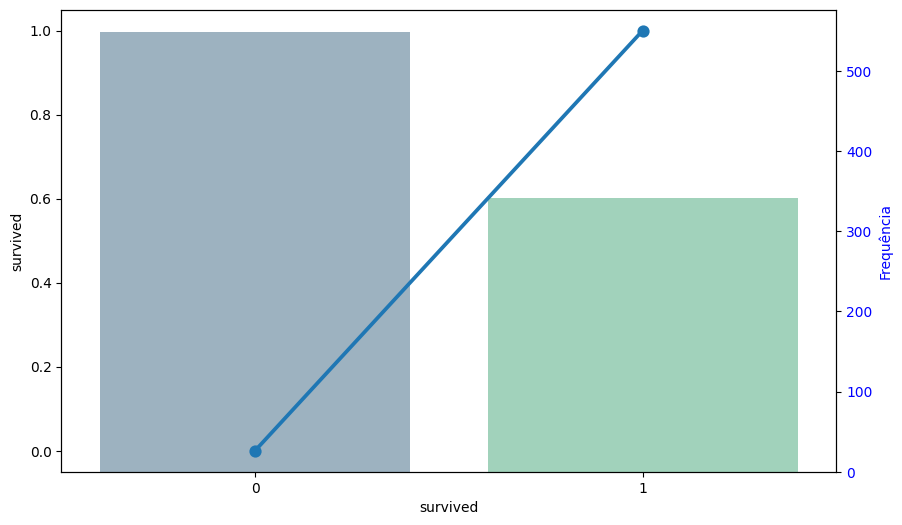

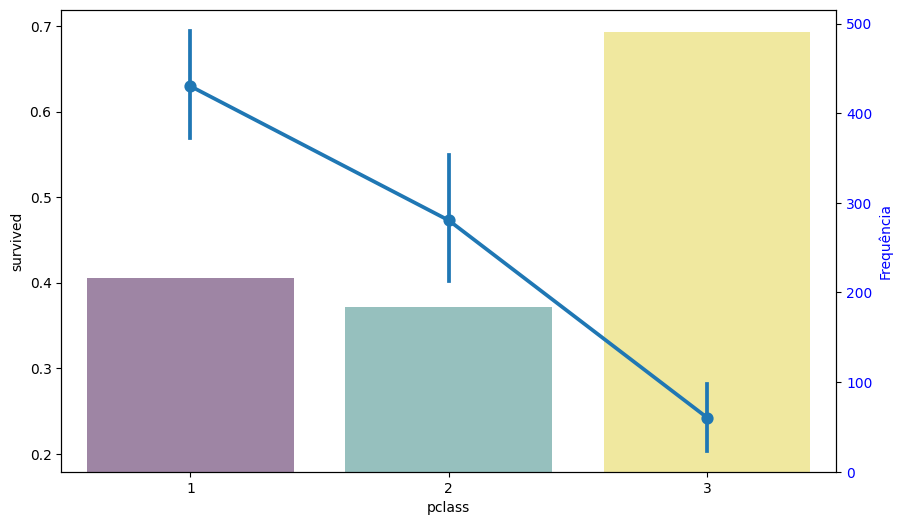

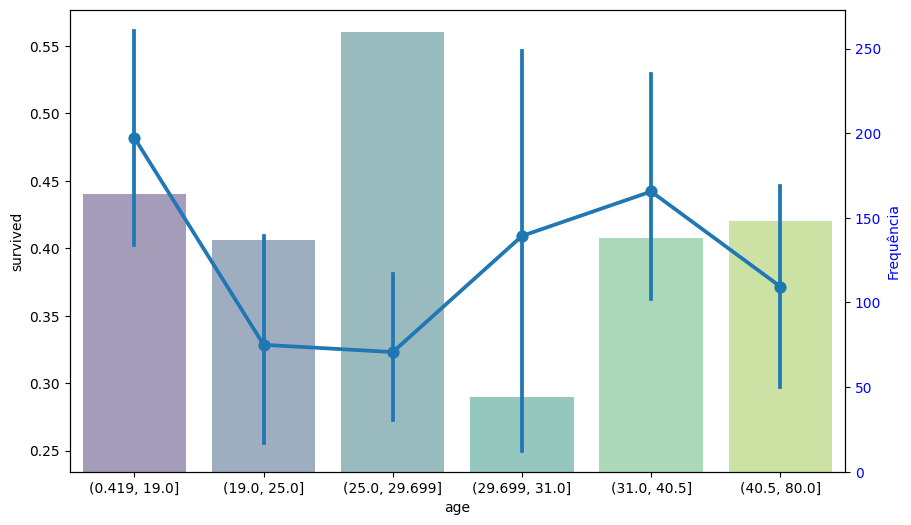

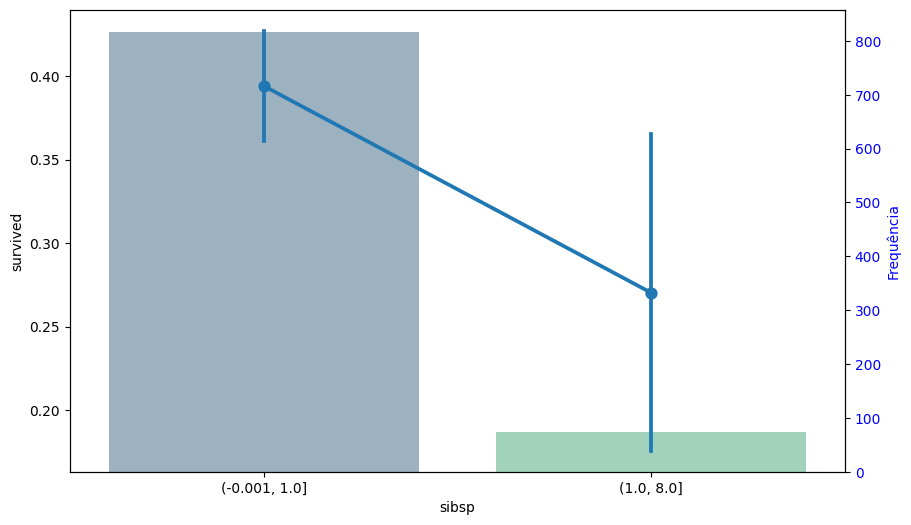

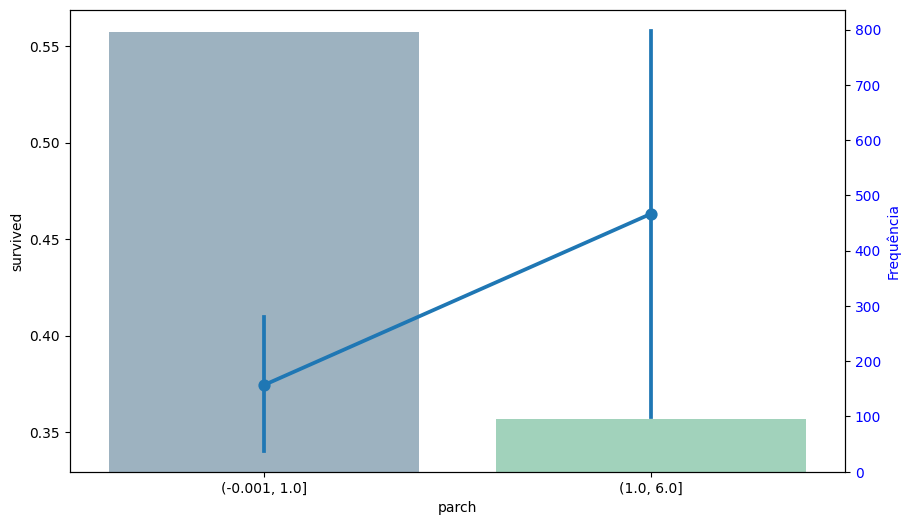

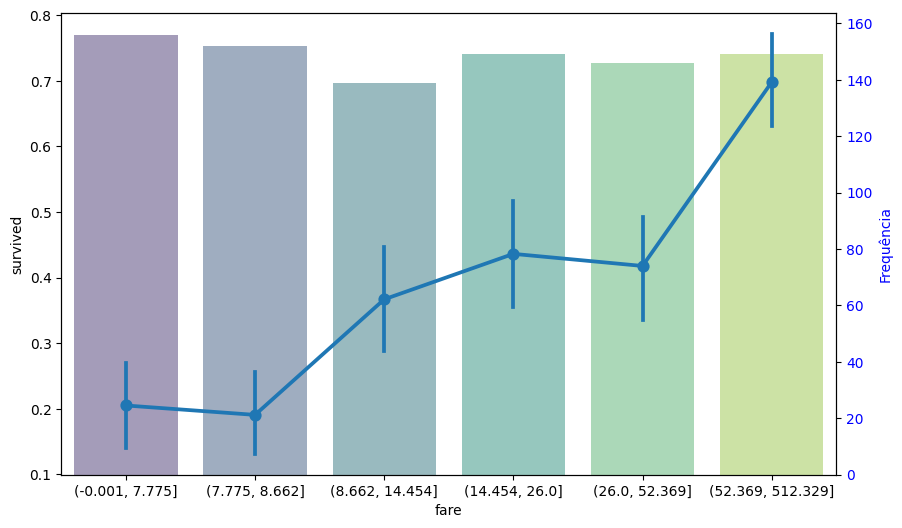

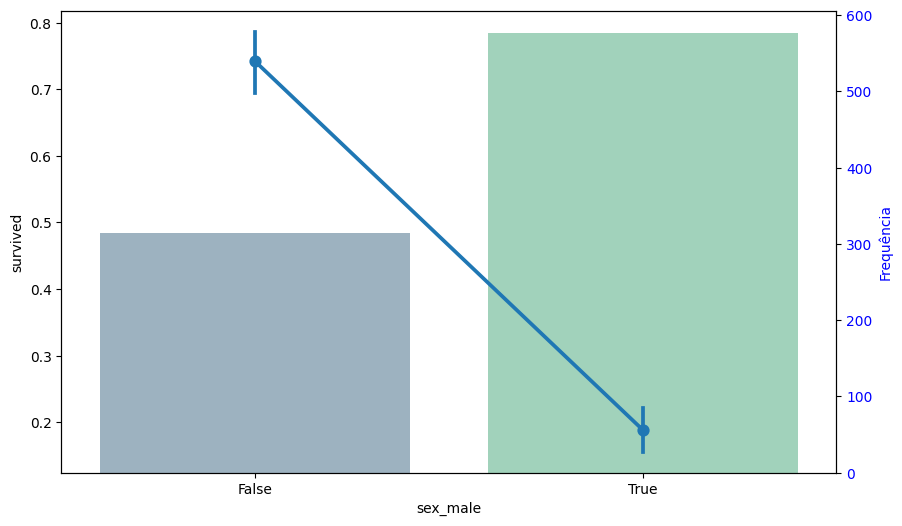

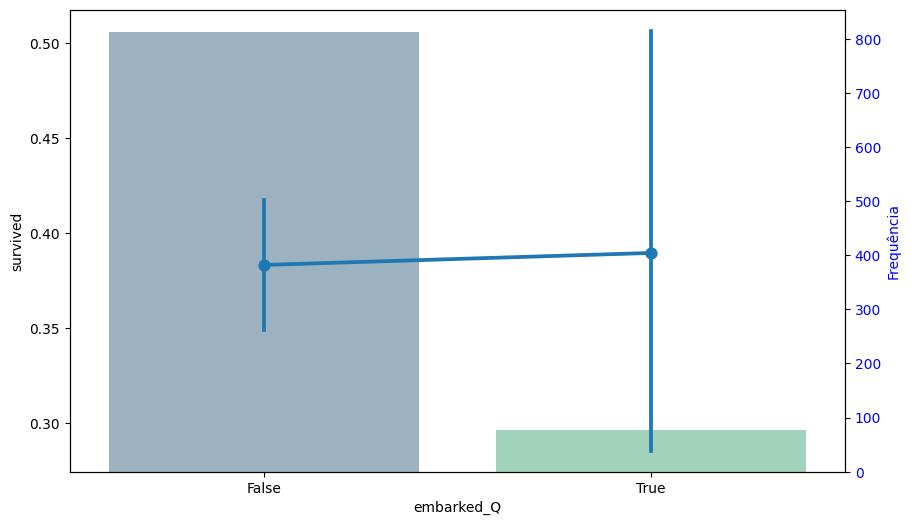

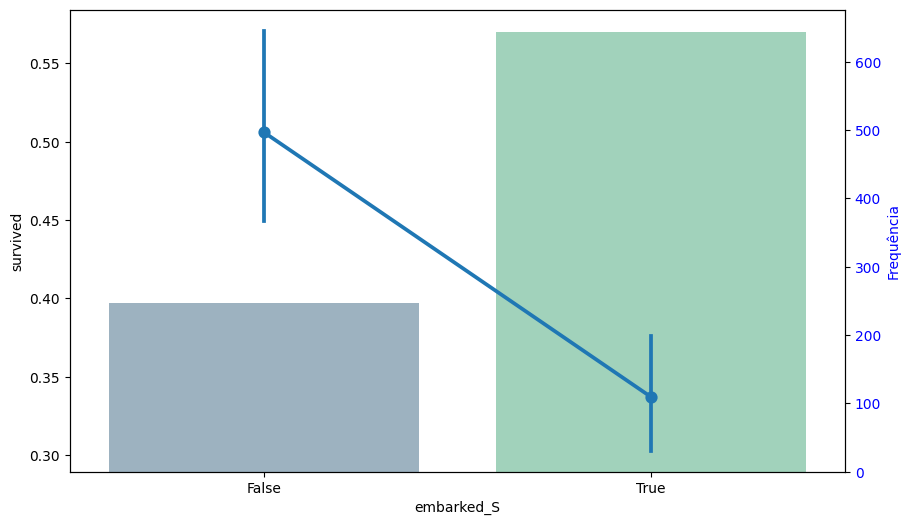

In [5]:
#%% A análise descritiva é sempre um passo muito importante
for var in variaveis:
    descritiva(titanic, var, vResp, 6)
    

In [6]:
#%% Dividir a base em treino e teste
X = titanic[variaveis]
y=titanic[vResp]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1729)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(668, 9) (668,) (223, 9) (223,)


In [7]:
#%% Construindo a primeira árvore
arvore1 = DecisionTreeClassifier()
arvore1.fit(X_train, y_train)


DecisionTreeClassifier()


Base de treino:
A acurácia da árvore é: 100.0%
A acurácia balanceada da árvore é: 100.0%
AUC-ROC: 100.00%
GINI: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       257

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



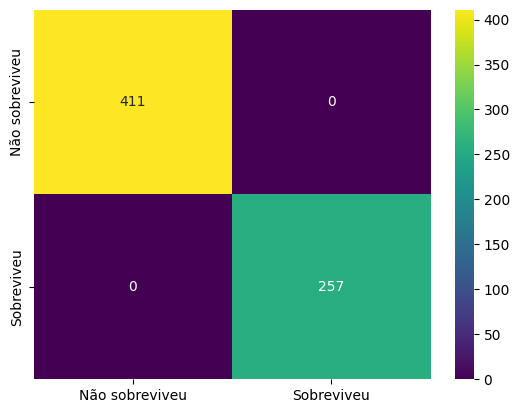

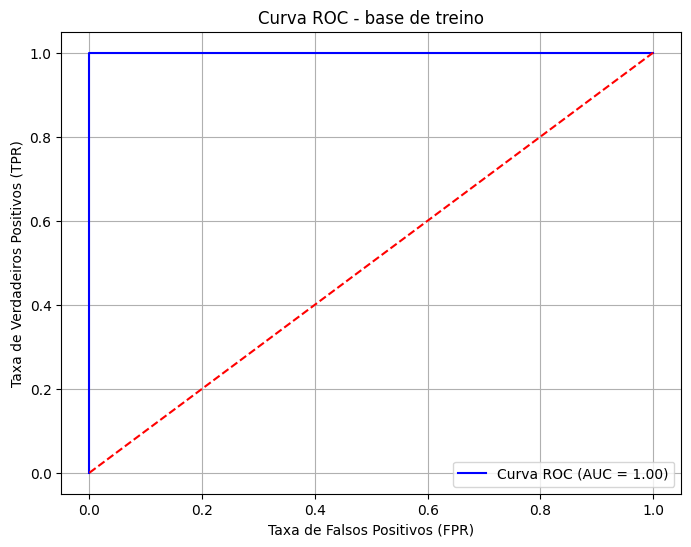


Base de teste:
A acurácia da árvore é: 100.0%
A acurácia balanceada da árvore é: 100.0%
AUC-ROC: 100.00%
GINI: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        85

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



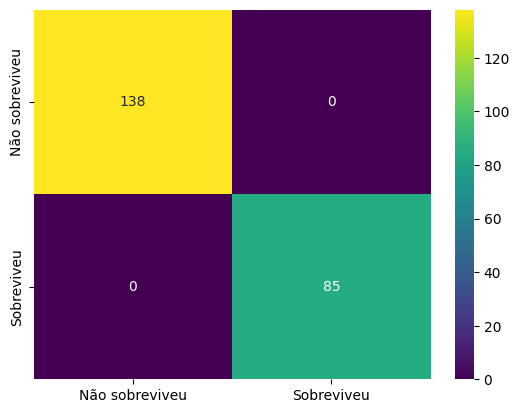

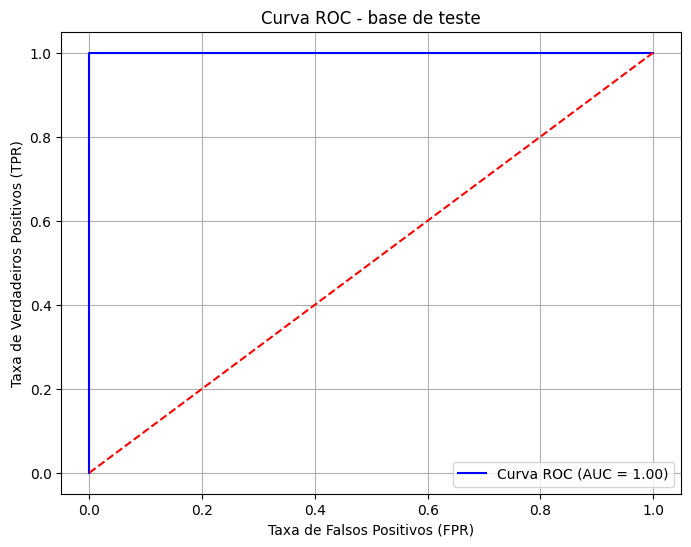

survived,0,1
row_0,,
0,138,0
1,0,85


In [8]:
#%% Avaliando a primeira árvore
avalia_clf(arvore1, y_train, X_train, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='treino')
avalia_clf(arvore1, y_test, X_test, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='teste')
pred = arvore1.predict(X_test)
pd.crosstab(pred, y_test)


In [9]:
#%% Pronto! Acurácia perfeita na base de testes... pera...
print(X_train.columns)
# O que há de errado com a árvore?


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')


In [10]:
#%% O erro numero 1 dos modelos perfeitos: a target no meio das features
# Corrigindo
variaveis.remove('survived')


In [11]:
#%% Refazendo as bases de treino e teste
X = titanic[variaveis]
y=titanic[vResp]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1729)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(668, 8) (668,) (223, 8) (223,)


In [12]:
#%% Treinando a primeira árvore (correta agora)
arvore1 = DecisionTreeClassifier()
arvore1.fit(X_train, y_train)


DecisionTreeClassifier()


Base de treino:
A acurácia da árvore é: 99.0%
A acurácia balanceada da árvore é: 98.7%
AUC-ROC: 99.97%
GINI: 99.94%

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       1.00      0.98      0.99       257

    accuracy                           0.99       668
   macro avg       0.99      0.99      0.99       668
weighted avg       0.99      0.99      0.99       668



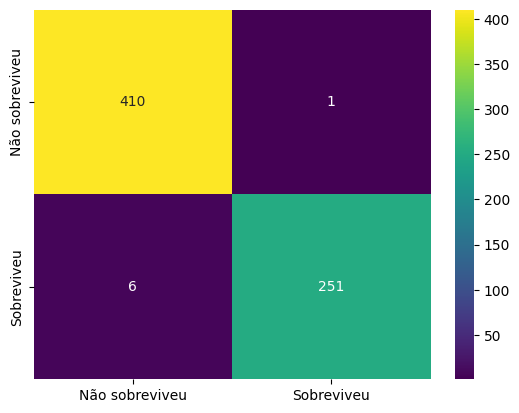

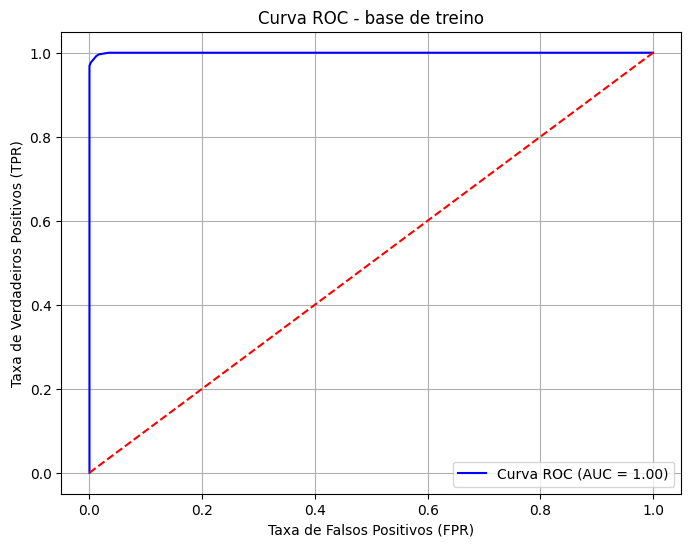


Base de teste:
A acurácia da árvore é: 78.5%
A acurácia balanceada da árvore é: 77.2%
AUC-ROC: 77.97%
GINI: 55.94%

               precision    recall  f1-score   support

           0       0.83      0.83      0.83       138
           1       0.72      0.72      0.72        85

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



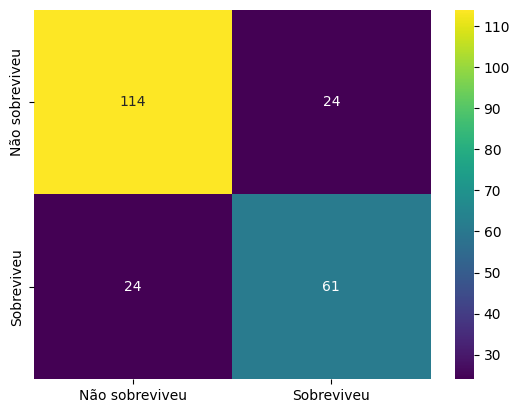

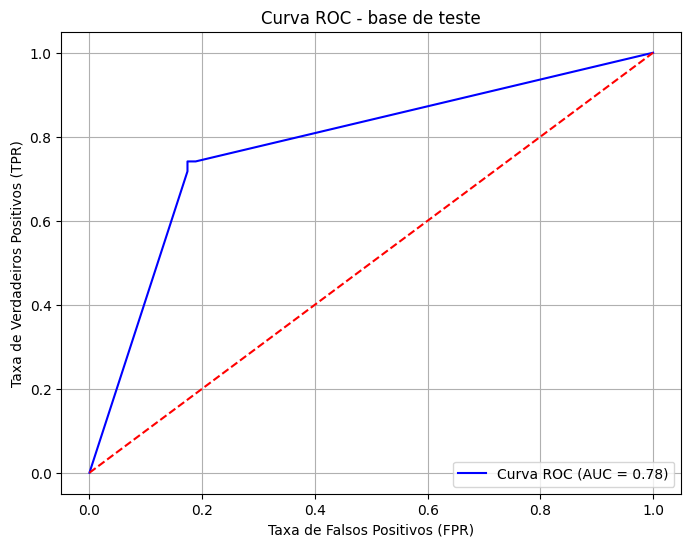

In [13]:
#%% Avaliando a primeira árvore (correta)
avalia_clf(arvore1, y_train, X_train, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='treino')
avalia_clf(arvore1, y_test, X_test, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='teste')

path = arvore1.cost_complexity_pruning_path(X_train, y_train)  # CCP Path na base de treino
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [14]:
#%% Verificar se há duplicações nos ccp_alphas
print(len(ccp_alphas))
len(pd.Series(ccp_alphas).unique())

ccp_alphas = pd.Series(ccp_alphas).unique()

59


<Axes: >

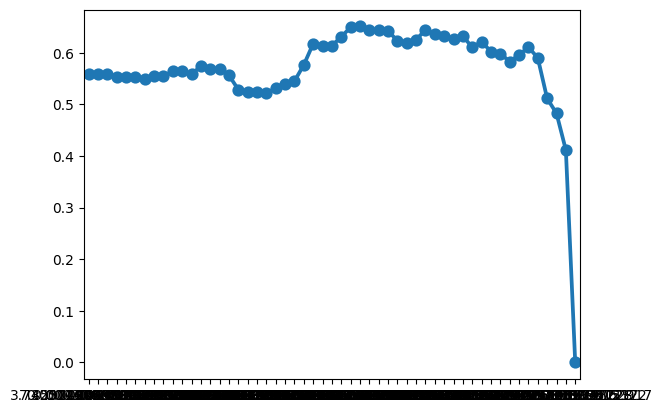

In [15]:
#%%  Avaliar diferentes alfas
ginis=[]

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    gini = auc*2-1
    ginis.append(gini)
    # Avaliar no conjunto de validação ou com validação cruzada

relatorio = pd.DataFrame({'ccp_alpha':ccp_alphas, 'gini':ginis})    
#%%
maximo = relatorio[relatorio.gini == relatorio.gini.max()]
ccp_max = maximo.ccp_alpha.iloc[0]
maximo
#%%
fig, ax = plt.subplots(1)
sns.pointplot(y=ginis, x=ccp_alphas, ax=ax)


In [16]:
# Configuração dos ticks
passo = 8
x_ticks = ax.get_xticks()[::passo]
x_tick_labels = [f'{x:.3%}' for x in ccp_alphas[::passo]]
ax.set_xticks(x_ticks, x_tick_labels)


In [17]:

# Título do gráfico
ax.set_title('Gini de treino por valor de CCP_alpha')


Text(0.5, 1.0, 'Gini de treino por valor de CCP_alpha')

In [18]:
# Adicionar linha vertical no ccp_alpha que resulta no Gini máximo
ax.axvline(x=maximo.index[0], color='red', linestyle='--', label=f'ccp_alpha (Gini máximo): {ccp_max:.3%}')


In [19]:
# Mostrar legenda
ax.legend()



Base de treino:
A acurácia da árvore é: 93.9%
A acurácia balanceada da árvore é: 93.0%
AUC-ROC: 96.06%
GINI: 92.12%

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       411
           1       0.95      0.89      0.92       257

    accuracy                           0.94       668
   macro avg       0.94      0.93      0.93       668
weighted avg       0.94      0.94      0.94       668



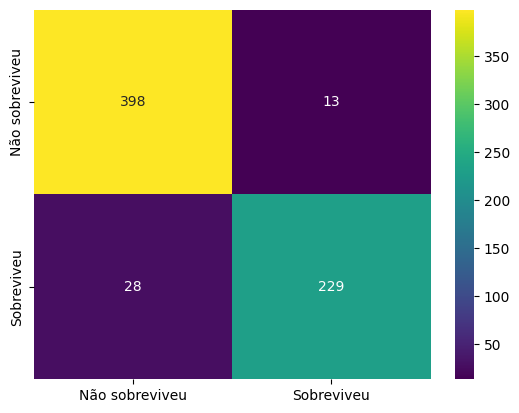

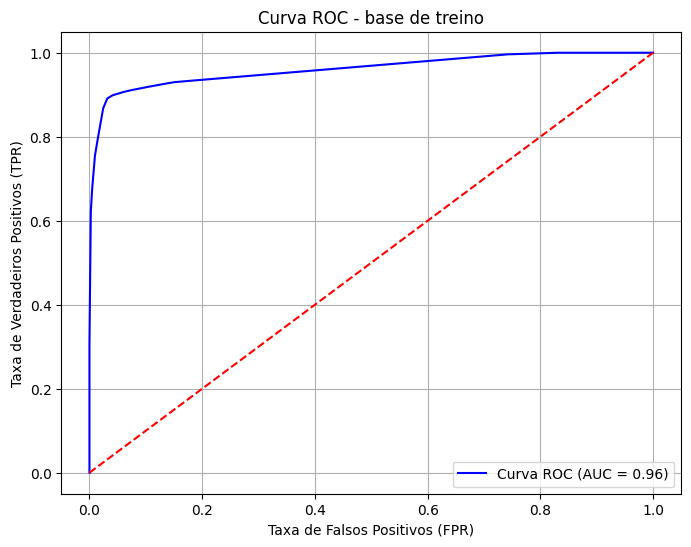


Base de teste:
A acurácia da árvore é: 81.6%
A acurácia balanceada da árvore é: 80.2%
AUC-ROC: 82.65%
GINI: 65.30%

               precision    recall  f1-score   support

           0       0.84      0.86      0.85       138
           1       0.77      0.74      0.75        85

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



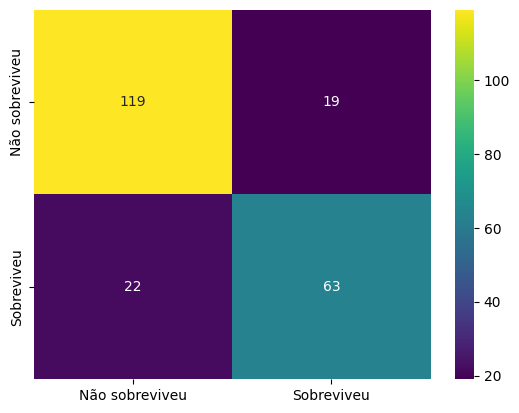

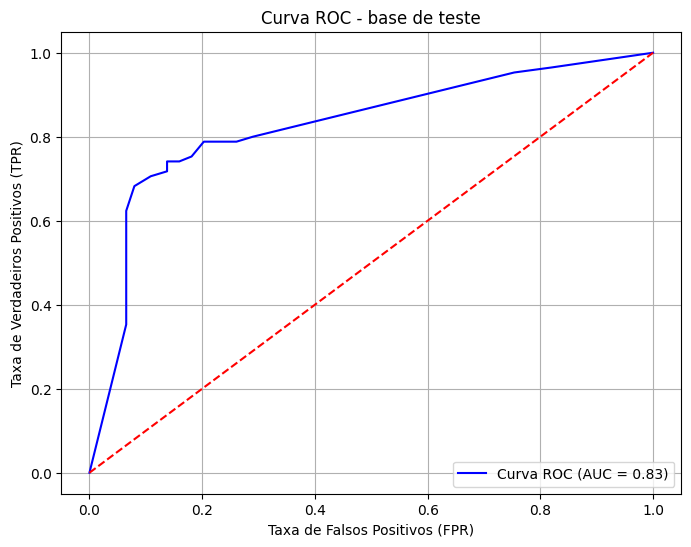

In [20]:
# Exibir o gráfico
plt.show()
#%%
arvore2 = DecisionTreeClassifier(ccp_alpha=ccp_max)
arvore2.fit(X_train, y_train)
#%%
avalia_clf(arvore2, y_train, X_train, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='treino')
avalia_clf(arvore2, y_test, X_test, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='teste')
#%%


In [21]:
# Configurar o grid (as opções que vamos testar)
param_grid = {'ccp_alpha': ccp_alphas}
param_grid = {
    'ccp_alpha': ccp_alphas,                # Valores de poda de complexidade de custo
    'max_depth': [None, 5, 10],       # Profundidade máxima da árvore
    'min_samples_split': [2, 10],        # Número mínimo de amostras para dividir um nó
    # 'min_samples_leaf': [1, 2, 4],          # Número mínimo de amostras em uma folha
    # 'max_features': [None, 'sqrt', 'log2'], # Número máximo de features consideradas
    'criterion': ['gini', 'entropy']        # Critério de divisão
}


In [22]:
# Configurar a validação cruzada (CV)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 

In [23]:
#Instanciar o classificador (árvore)
clf = DecisionTreeClassifier(random_state=42)

In [24]:
# Instanciar o GridSearchCV com o grid, CV e classificador
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=kf,
    scoring='roc_auc',
    return_train_score=True
)

In [25]:
# executar o grid
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.74251497e-05, 7.35371363e-05, 2.49500998e-04,
       3.74251497e-04, 4.99001996e-04, 4.99001996e-04, 4.99001996e-04,
       5.70287995e-04, 7.98403194e-04, 8.73253493e-04, 8.73253493e-04,
       8.81570193e-04,...
       1.99600798e-03, 2.00840555e-03, 2.10828343e-03, 2.17746326e-03,
       2.30516411e-03, 2.49500998e-03, 2.68213573e-03, 3.09058642e-03,
       3.31573475e-03, 3.82704772e-03, 3.96235491e-03, 6.11896476e-03,
       9.20474322e-03, 1.33734112e-02, 1.61418067e-02, 2.85938808e-02,
       1.61494038e-01]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 10]},
             return_train_score=True, scoring='roc_auc')

In [26]:
# Resultados
best_alpha = grid_search.best_params_['ccp_alpha']
best_score = grid_search.best_score_
print(f"Melhor alpha: {best_alpha}")
print(f"Acurácia média na validação cruzada: {best_score:.4f}")

#%%
resultados = pd.DataFrame(grid_search.cv_results_)
resultados.head()
#%%
resultados.columns


Melhor alpha: 0.003962354912878935
Acurácia média na validação cruzada: 0.8749


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ccp_alpha', 'param_criterion', 'param_max_depth',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

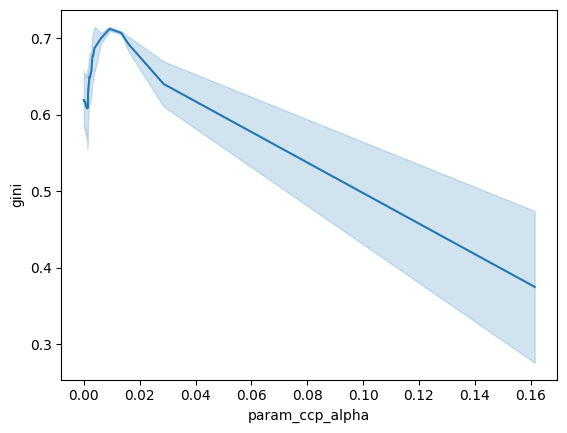

In [27]:
############ Análise do Grid ###############
#%% Avaliação do gini na base de cross validation por ccp_alpha
resultados['gini'] = resultados.mean_test_score*2-1
sns.lineplot(data=resultados, x='param_ccp_alpha', y='gini')
plt.show()

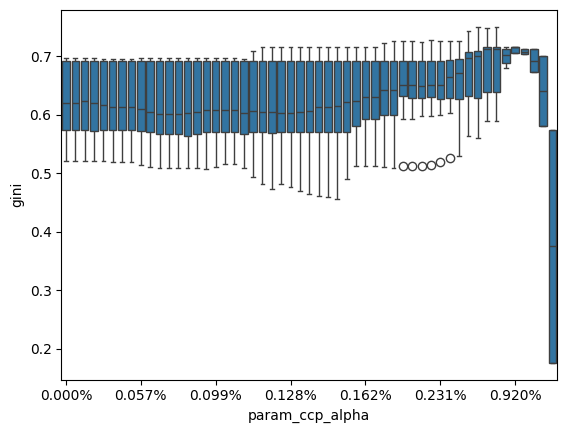

In [28]:
#%%  Boxplot do gini na base de CV por ccp_alpha
# Aqui estou interessado em avaliar máximos e mínimos
fig, ax = plt.subplots(1)

resultados['gini'] = resultados.mean_test_score*2-1
sns.boxplot(data=resultados, 
             x=resultados['param_ccp_alpha'].astype('str'), 
             y='gini',
             ax=ax)
passo = 8
x_ticks = ax.get_xticks()[::passo]
x_tick_labels = [f'{x:.3%}' for x in ccp_alphas[::passo]]
ax.set_xticks(x_ticks, x_tick_labels)
plt.show()

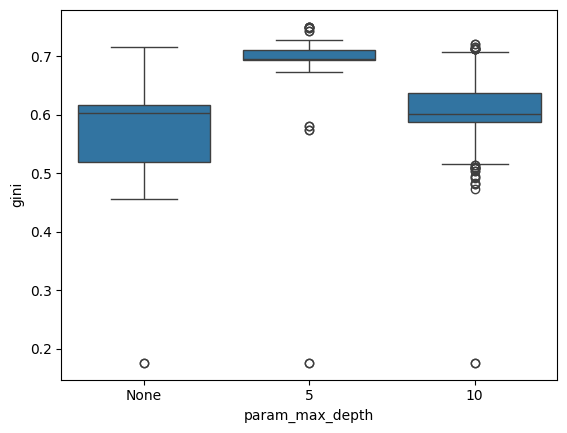

In [29]:
#%% Gini por profundidade máxima
resultados['gini'] = resultados.mean_test_score*2-1
sns.boxplot(data=resultados, 
             x=resultados['param_max_depth'].astype('str'), 
             y='gini')
plt.show()

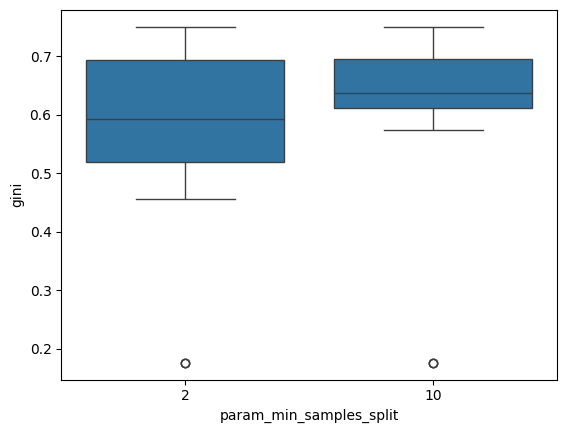

In [30]:
#%% Gini por param_min_samples_split
resultados['gini'] = resultados.mean_test_score*2-1
sns.boxplot(data=resultados, 
             x=resultados['param_min_samples_split'].astype('str'), 
             y='gini')
plt.show()

In [31]:
#%% Treinar o modelo final com o melhor alpha
final_clf = grid_search.best_estimator_
prob = final_clf.predict_proba(X_test)[:,1]


In [32]:
# Avaliar na base de teste
test_score = final_clf.score(X_test, y_test)
auc = roc_auc_score(y_test, prob)
gini = auc*2-1
print(f"Acurácia na base de teste: {test_score:.4f}")
print(f"Gini na base de teste: {gini:.4f}")

#%%
df_test = X_test.copy()
df_test['y'] = y_test
df_test['p'] = prob
df_test.head(3)

Acurácia na base de teste: 0.7892
Gini na base de teste: 0.5957


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,y,p
746,3,16.0,1,1,20.2500,True,False,True,0,0.090062
40,3,40.0,1,0,9.4750,False,False,True,0,0.000000
500,3,17.0,0,0,8.6625,True,False,True,0,0.090062


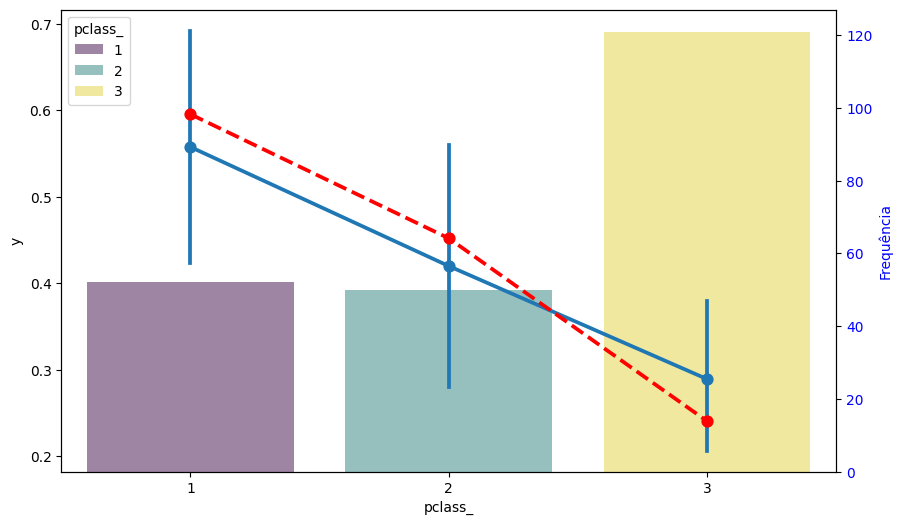

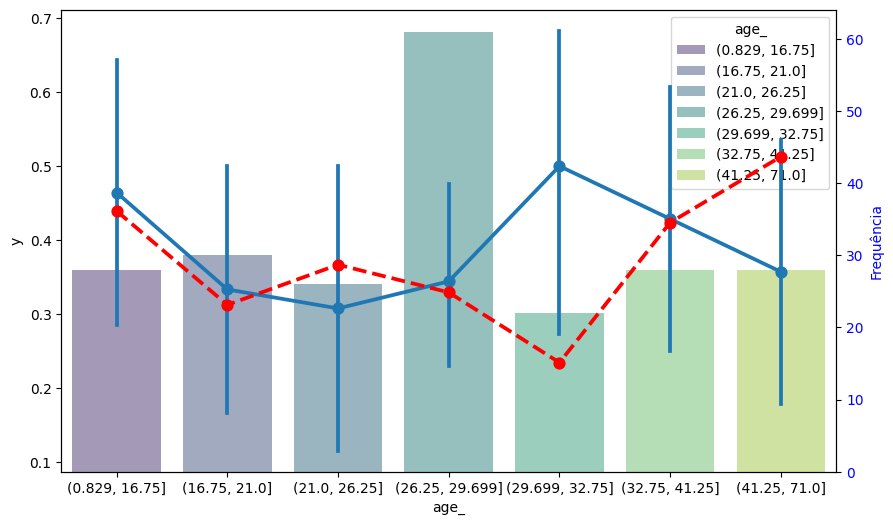

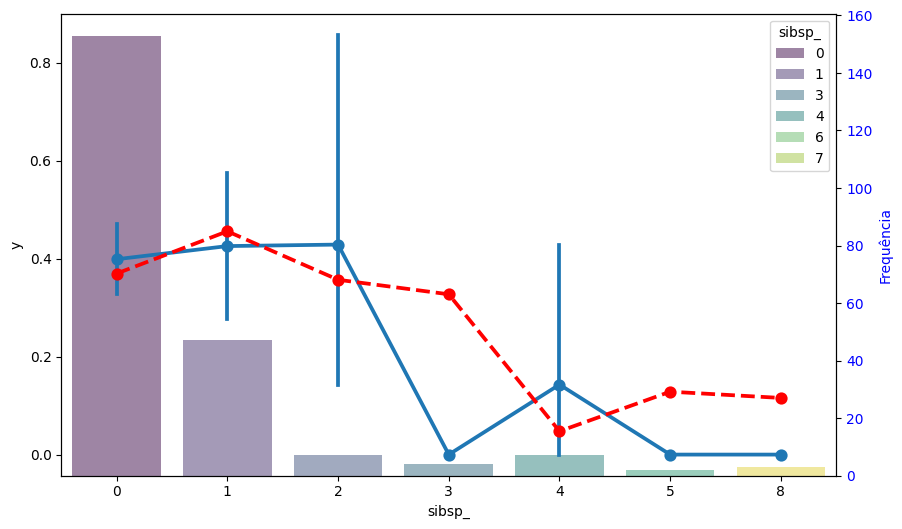

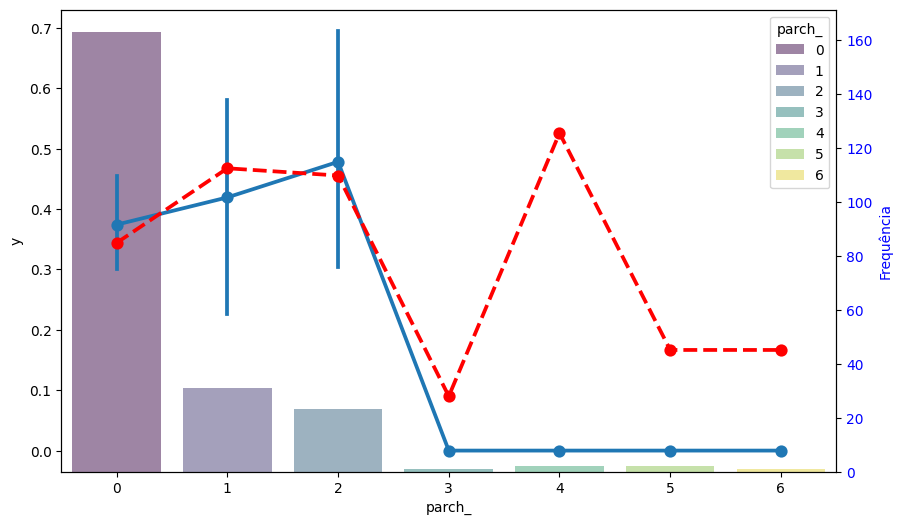

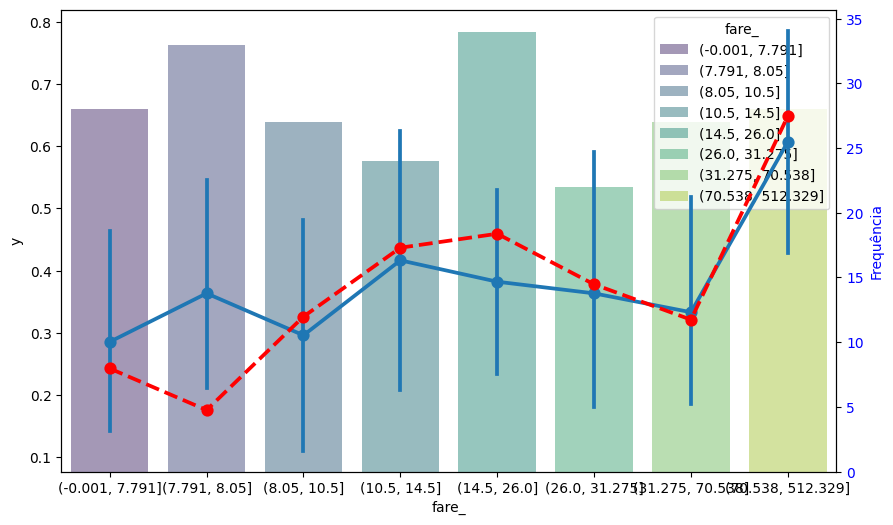

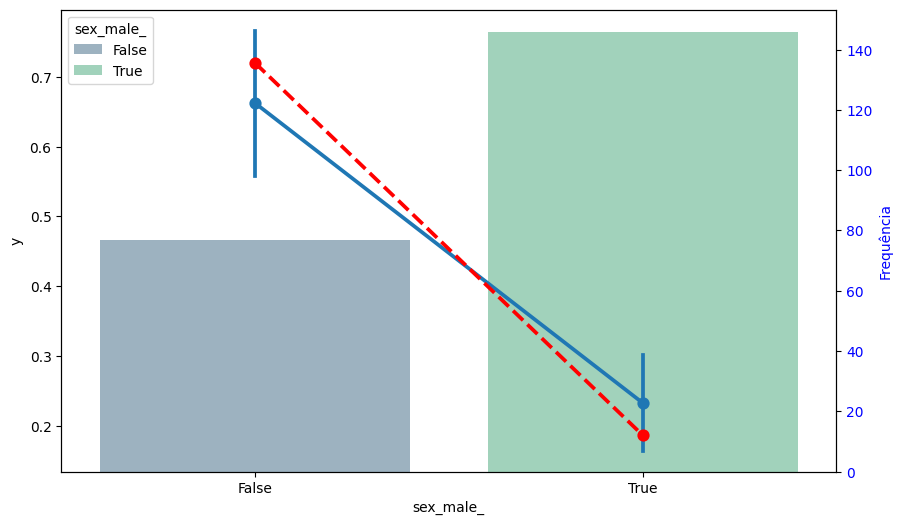

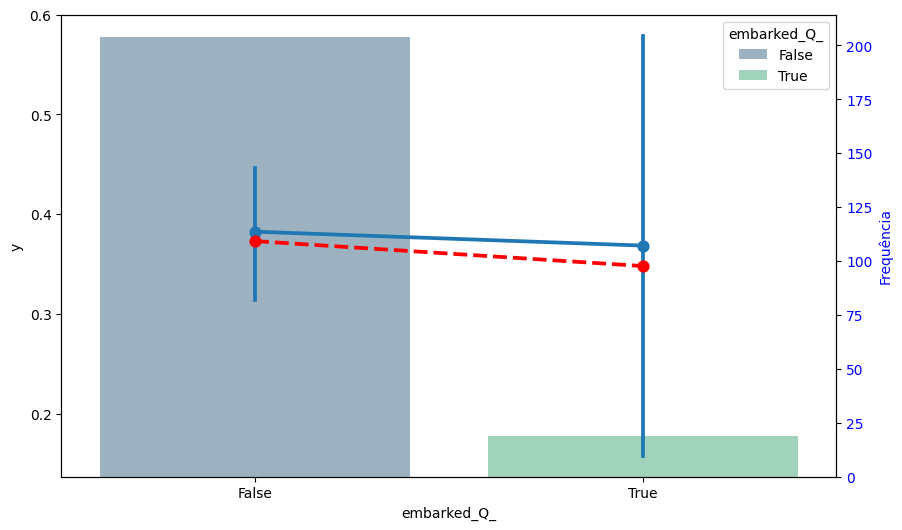

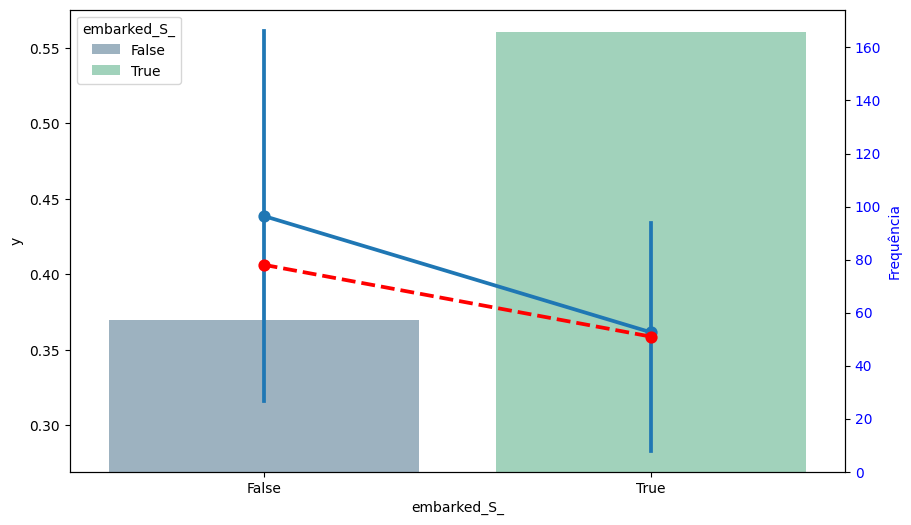

In [33]:
#%% Avaliando a resposta do modelo para cada variável
for var in X_test.columns:
    diagnóstico(df_test, var, vresp='y', pred='p', max_classes=8)


In [34]:
#%% Salvar o modelo final em um arquivo usando Pickle
with open('arvore_final.pkl', 'wb') as file:
    pickle.dump(final_clf, file)
    